## Part 3 - Bivariate Analysis

In [ ]:
import seaborn as sns

df_cleaned = df_campaign.copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    41188 non-null  int64 
 1   age_unk                41188 non-null  bool  
 2   occupation             41188 non-null  object
 3   marital_status         41188 non-null  object
 4   education_level        41188 non-null  object
 5   credit_default         41188 non-null  object
 6   housing_loan           16399 non-null  object
 7   personal_loan          37042 non-null  object
 8   contact_method         41188 non-null  object
 9   campaign_calls         41188 non-null  int64 
 10  previous_contact_days  41188 non-null  int64 
 11  subscription_status    41188 non-null  bool  
dtypes: bool(2), int64(3), object(7)
memory usage: 3.2+ MB


### Age

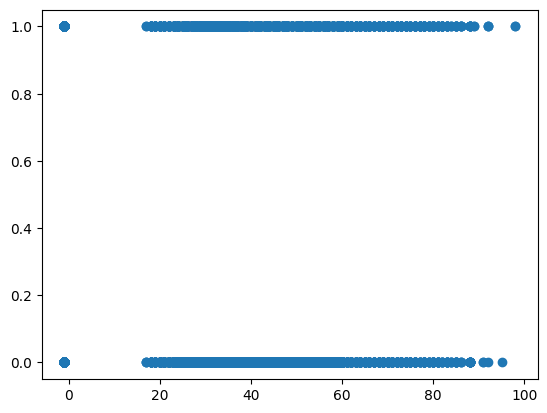

In [ ]:
# Eyeballing it the only difference seems to be visible at older ages that are
# already outliers as known from the univariate analysis
plt.scatter(df_cleaned.age, df_cleaned.subscription_status)

In [ ]:
df_cleaned.age.astype(int).corr(df_cleaned.subscription_status.astype(int))

np.float64(0.023171758137650576)

In [ ]:
print("Subscribed = True")
df_temp_age_cleaned = df_cleaned[df_cleaned['age'] != -1]
print(df_temp_age_cleaned[df_temp_age_cleaned.subscription_status == True].age.describe())
print("\nSubscribed = False")
print(df_temp_age_cleaned[df_temp_age_cleaned.subscription_status == False].age.describe())

Subscribed = True
count    4191.00000
mean       40.93486
std        13.90226
min        17.00000
25%        31.00000
50%        37.00000
75%        50.00000
max        98.00000
Name: age, dtype: float64

Subscribed = False
count    32800.000000
mean        39.909085
std          9.901279
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         95.000000
Name: age, dtype: float64


The mean, IQRs and min/max are all very similar when checking the distribution of ages amongst those who subscribed and those who didn't. There seems to be a very slight increase among all the values provided by the describe function for those who subscribed, and while it is definitely not enough to make a decent prediction on its own it should be helpful for the model

### Age Unknown

In [ ]:
df_cleaned.age_unk.astype(int).corr(df_cleaned.subscription_status.astype(int))

np.float64(-0.006043850110246849)